# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv(r'D:/DataLovesAcademy/data/yulu_rental.csv')

In [3]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [8]:
df.shape

(10886, 19)

В наборі 10 886 строк та 19 колонок

In [11]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,19,51,2,Wednesday,2012,12,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,19,51,2,Wednesday,2012,12,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,19,51,2,Wednesday,2012,12,21


рівень деталізації - погодинний

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


In [13]:
dayly_rent = df['count'].resample('D').sum()

In [32]:
dayly_rent

datetime
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
              ... 
2012-12-15    5047
2012-12-16    3786
2012-12-17    4585
2012-12-18    5557
2012-12-19    5267
Freq: D, Name: count, Length: 719, dtype: int64

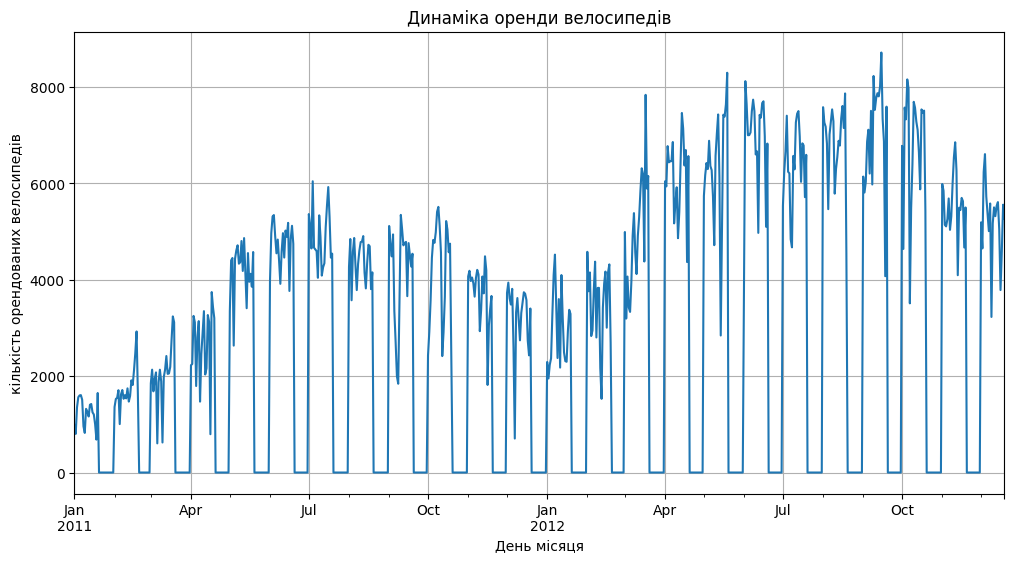

In [17]:
dayly_rent.plot(
    # kind='line',
    # marker='o',
    figsize=(12, 6),
    title='Динаміка оренди велосипедів',
    xlabel='День місяця',
    ylabel='кількість орендованих велосипедів',
    grid=True
);

In [19]:
weekday_rentals = df.groupby('weekday')['count'].sum()
weekday_rentals
# припускала, що заломи - це вихядні дні, але ні.

weekday
Friday       302504
Monday       295296
Saturday     311518
Sunday       285546
Thursday     306401
Tuesday      291985
Wednesday    292226
Name: count, dtype: int64

In [31]:
working_day_rentals = df.groupby(['workingday'])['count'].sum()
working_day_rentals

workingday
0     654872
1    1430604
Name: count, dtype: int64

1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
виходить, що заломи - це не означає, що в ці дні немає оренди, це означає, що к-ть орендованих веліков просто значно менша ніж в пікові робочі дні.
але чесно кажучу я до кінця все одно не розумію природу цих заломів..я побудувала той же графік в гугл-щіт, але таких заломів там немає. 
Так, у деякі дні дійсно є мала к-ть оренди, але є не 0.
Ну а виправити  це можна взявши якусь середню за кожен тиждень.

2. Які загальні тенденції ви бачите на графіку? - йде зростання оренди велосипедів, що свідчить про популяризацію цієї послуги.
3. Чи помітні якісь сезонні коливання? - так, в зимку люди менше користуються послугою, а починаючи з квітня до жовтня - це піковий сезон користування велосипедами.
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії? - напевно це прив'язано до сезонності. Аномально низькі значення спостерігаються зимою.


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами. Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте сезони не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який сезон найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном?

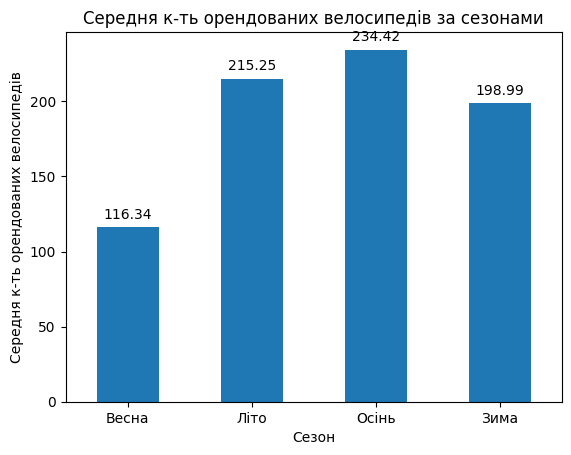

In [60]:
mean_seasons = df.groupby('season')['count'].mean()
season_names = {1: 'Весна', 2: 'Літо', 3: 'Осінь', 4: 'Зима'}
mean_seasons.index = mean_seasons.index.map(season_names)
ax = mean_seasons.plot.bar(
    title  = 'Cередня к-ть орендованих велосипедів за сезонами',
    xlabel = 'Сезон',
    ylabel = 'Cередня к-ть орендованих велосипедів',
    rot    = 360
);
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

Питання для інтерпретації:

1. В який сезон найбільша середня кількість оренди велосипедів? - восени
2. Як ви можете пояснити таку сезонну закономірність? - тут взагалі дивні сезони, але із графіка вище ми бачили що літо і осінь найпопулярніші сезони для оренди велосипедів.
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном? 234,4/116,3 = 2,02 (в два рази)

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


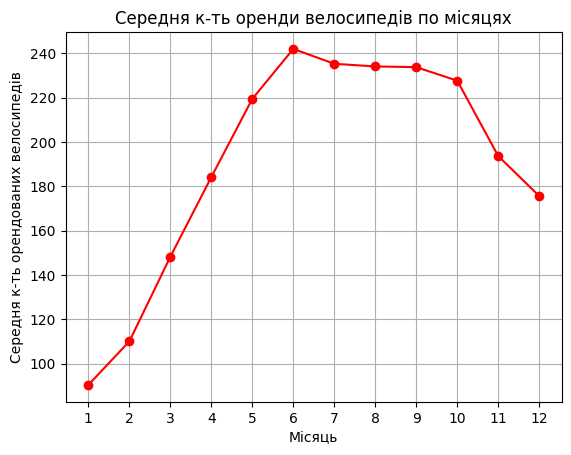

In [75]:
monthly_avg = df.groupby('month')['count'].mean()
ax = monthly_avg.plot(title  = 'Cередня к-ть оренди велосипедів по місяцях',
                xlabel = 'Місяць',
                ylabel = 'Cередня к-ть орендованих велосипедів',
                marker='o',
                grid=True,
                color='red'
                );
ax.set_xticks(range(1, 13));

В які місяці спостерігається пік та спад оренди? - пік у шостому місяці, спад у першому
Чи збігається ця закономірність з результатами з попереднього завдання? - так, раніше ми казали про те, шо найактивніший час це квітень - жовтень,тут бачимо майже те саме, але починаючи з травня місяця
Як може вплинути клімат на оренду велосипедів протягом року? - клімат впливає на комфорт і безпеку. Тому екстримальні погоди (як в літку так і в зимку) будуть впливати на зниження користування послугою. Люди будуть брати велосипеди лише за комфортних погодних умов.

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму з часткою записів за погодними умовами
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

In [116]:
colors = ['#baf162', '#afce7e', '#bbe47a', 'red']

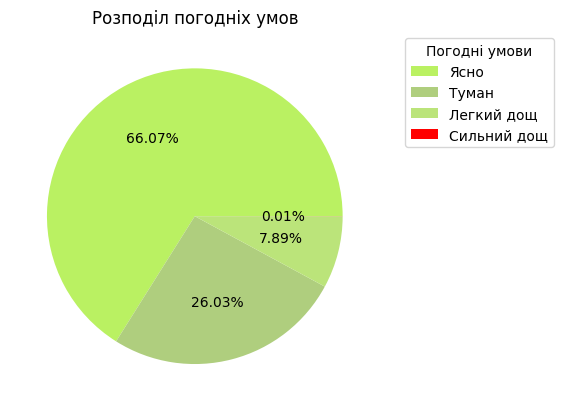

In [122]:
weather = df.groupby('weather')['weather'].count()
weather_names = {
    1: 'Ясно',
    2: 'Туман',
    3: 'Легкий дощ',
    4: 'Сильний дощ'
}
weather.index = weather.index.map(weather_names)
weather.plot.pie(
    title  = 'Розподіл погодніх умов',
    labels=None,
    ylabel='',
    autopct='%1.2f%%',
    colors=colors    
);
plt.legend(weather.index, title='Погодні умови', bbox_to_anchor=(1.05, 1), loc='upper left');

Питання для інтерпретації:

Яка погода переважає в датасеті?  - Ясна погода
Чи є дні із сильним дощем? Яка їх частка? - є, але зовсім мала 0,01%
Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів? - Ясна погода і напевно туманна є найсприятливішими. Деякі люди готові їздити і в легкий дощ, проте майже нієно не поїде у сильний дощ. Тобто чим гірша погода - тим менше люди користуються велосипедами.

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

Text(0, 0.5, 'Тип погоди')

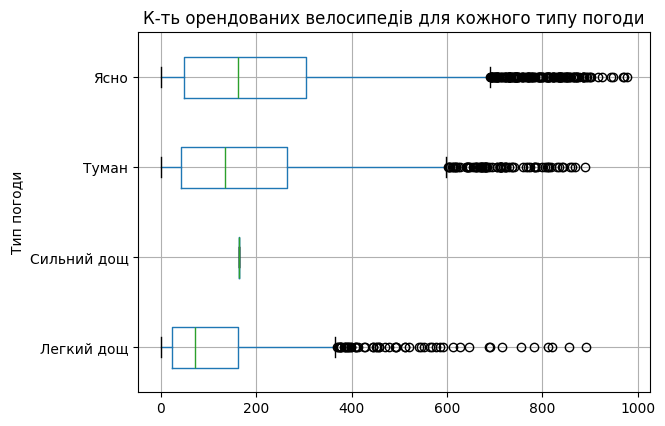

In [127]:
df['weather_name'] = df['weather'].map(weather_names)
df.boxplot(column='count', by='weather_name', vert=False);
plt.title('К-ть орендованих велосипедів для кожного типу погоди')
plt.suptitle('')  # Видаляємо автоматичний заголовок
plt.ylabel('Тип погоди')

Питання для інтерпретації:

При якій погоді найбільший розкид у кількості оренди? - при Ясній погоді
Чи є викиди (outliers) в даних? При якій погоді? - є. при ясній та туманній погодні. свідчить про аномально велику к-ть оренди великів
При якій погоді медіанне значення оренди найвище? - при ясній

Очікуваний результат:

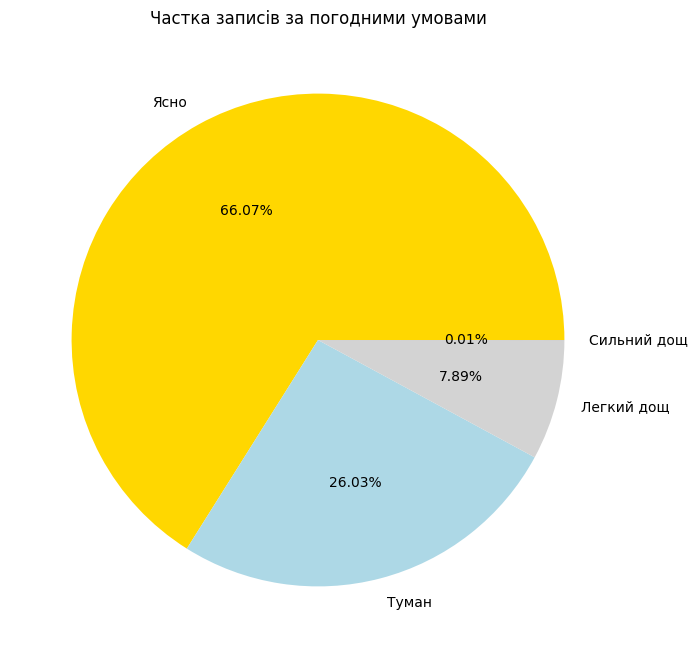

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

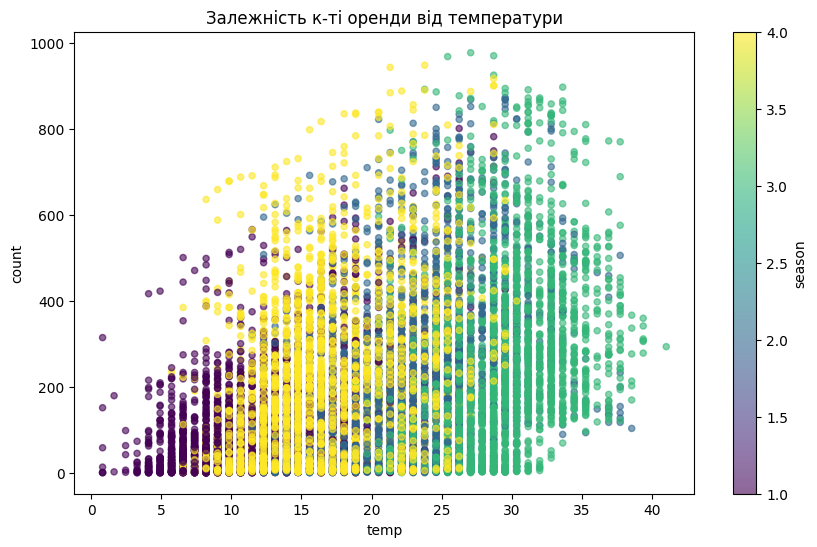

In [131]:
df.plot.scatter(
    x='temp',
    y='count',
    c='season',
    colormap='viridis',
    title='Залежність к-ті оренди від температури',
    figsize=(10, 6),
    alpha=0.6
);

Чи є зв'язок між температурою та кількістю оренди? Який? - так, є! чим вища температруа тим більшу к-ть оренди ми спомтерігаємо.

## Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

C:\Users\User\AppData\Local\Temp\ipykernel_12948\2591871645.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_rent = df.groupby('weekday')[['casual', 'registered']].mean()


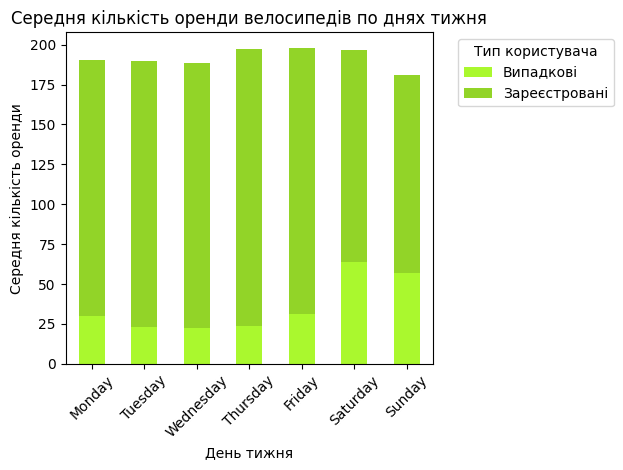

In [144]:
weekday_rent = df.groupby('weekday')[['casual', 'registered']].mean()

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_rent = weekday_rent.reindex(ordered_days)

weekday_rent.plot(kind='bar', stacked=True, color=['#aaf82e', '#92d428'])
plt.title('Середня кількість оренди велосипедів по днях тижня')
plt.xlabel('День тижня')
plt.ylabel('Середня кількість оренди')
plt.xticks(rotation=45)
plt.legend(title='Тип користувача', labels=['Випадкові', 'Зареєстровані'],bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Питання для інтерпретації:

В які дні тижня більше оренд від зареєстрованих користувачів? - з понеділка по п'ятницю
Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня? - у вихідні випадкові користувачі скоріш за все зростають через те, що люди використовують велики для розваг/прогулянок, а от зарастровані - кристуються як основним транспортом.